<a href="https://colab.research.google.com/github/umar052001/Deep-Learning-with-Tensorflow/blob/master/02_neural_network_classification_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classfication with Tensorflow

A classfication problem is where you try to classify something is one thing or another.

Few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification


## Creating data to fit and view

In [ ]:
from sklearn.datasets import make_circles

# Make 100 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)


In [ ]:
#Features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

As our data is hard to understand lets do visualization

In [ ]:
import pandas as pd 
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


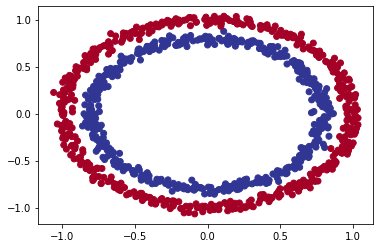

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0],X[:,1], c=y, cmap=plt.cm.RdYlBu);

## Input and Output shapes

In [ ]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# How many samples we're working with
len(X), len(y)

(1000, 1000)

In [ ]:
# First example
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modeling

1. Create or import a model
2. Compile
3. Evaluate the model
4. Fit the model
5. Tweak
6. Evaluate
...

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)

# Create
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# Fitting
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4830


In [ ]:
# Improving our model
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since, we're working on Binary classification and our model is performing as if it's guessing.
So, lets try stepping things up a notch and adding an extra layer.

In [ ]:
tf.random.set_seed(42)
#Create
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
])
#Compile
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])
#Fitting
model_2.fit(X, y, epochs=100, verbose=0)

In [ ]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

In [ ]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

Our model still giving us 50% accuracy. Now what we can do?
Lets, add an activation function.

## Improving techniques:
1. Create - Add more layers
1. Compile - Choose different optimization functions such as Adam instead of SGD
1. Fitting - Fit for more epochs(long training)

In [ ]:
tf.random.set_seed(42)

# Create
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# Compile
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# Fitting
model_3.fit(X, y, epochs=100, verbose=0)

In [ ]:
# Evaluate
model_3.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980255246162415, 0.5080000162124634]

To visualize our model's prediction lets create a plotting function:
* Take in trained model, features (X) and labels(y)
* Create a mesh grid of the different X values
* Make prediction across the meshgrid
* Plot predictions as well as a line between different zones where each unique class falls.

In [ ]:
import numpy as np
def plot_decision_boundry(model, X, y):
  """
  Plots the decision boundry created by the model predicted on X
  """
  # Define the axis boundries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multiclass 
  if len(y_pred[0]) > 1:
    print("doing multiclass classfication...")
    # Reshape our prediction
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot the decision boundry
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classification...


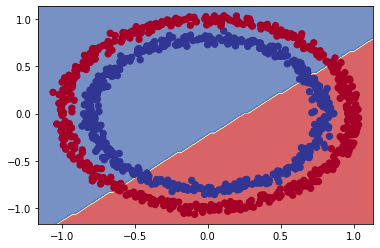

In [ ]:
plot_decision_boundry(model_3, X, y)

## Non-Linearity

In [ ]:
tf.random.set_seed(42)

# Create a model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# Compiling our model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# Fitting our model
history = model_4.fit(X,y,epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 9ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/

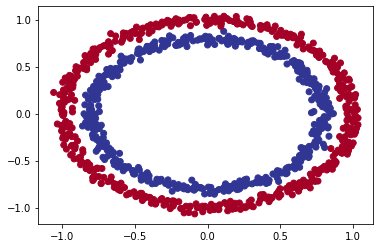

In [ ]:
# Check our data
plt.scatter(X[:,0], X[:,1],c=y,cmap=plt.cm.RdYlBu)

doing binary classification...


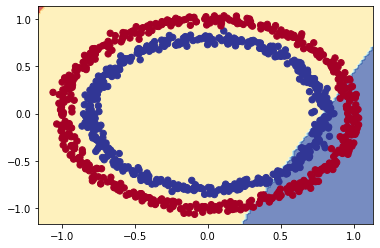

In [ ]:
# Check the decison boundry for model 4
plot_decision_boundry(model_4, X,y)

Lets build our model with non-linear activation function.

In [ ]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/

doing binary classification...


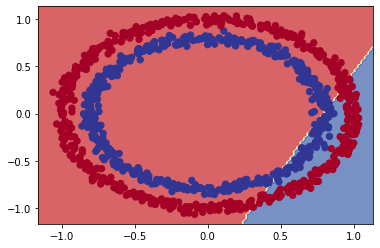

In [ ]:
plot_decision_boundry(model_5, X, y)

In [ ]:
# Now try everything in conjunction with each other
tf.random.set_seed(42)

# Creating
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compiling
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# Fitting
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [ ]:
model_6.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

doing binary classification...


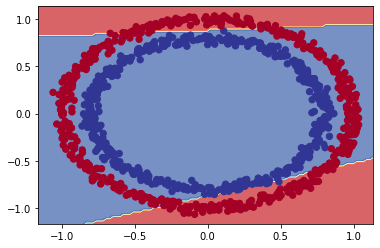

In [ ]:
plot_decision_boundry(model_6,X,y)

In [ ]:
# Adding an output layer
tf.random.set_seed(42)

# Creating
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compiling
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# Fitting
history = model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/

In [ ]:
model_7.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2948 - accuracy: 0.9910


[0.2948004901409149, 0.9909999966621399]

doing binary classification...


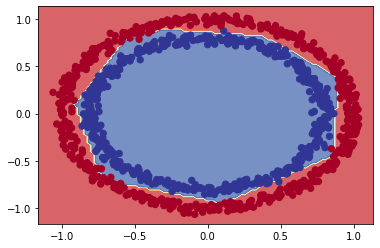

In [ ]:
plot_decision_boundry(model_7, X, y)

Now lets understand the concept of linear and non linear

In [ ]:
A = tf.cast(tf.range(-10,10),dtype=tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

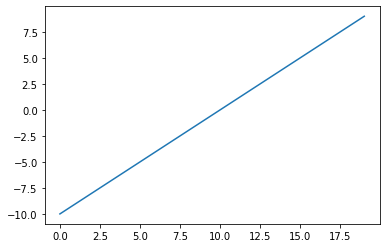

In [ ]:
plt.plot(A);

In [ ]:
# Replicating sigmoid
def sigmoid(x):
  return 1/(1+tf.exp(-x))

In [ ]:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

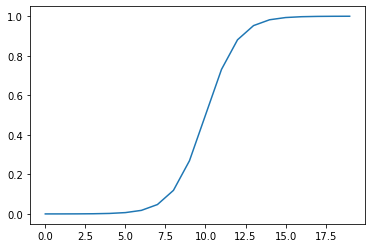

In [ ]:
plt.plot(sigmoid(A));

In [ ]:
# Recreate relu function
def relu(x):
  return tf.maximum(0, x)

In [ ]:
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

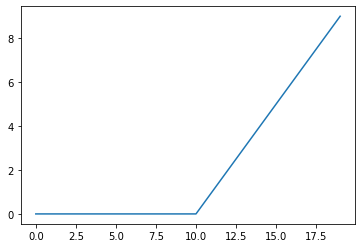

In [ ]:
plt.plot(relu(A))

So, relu turn the negative numbers into zero

In [ ]:
# Lets apply linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

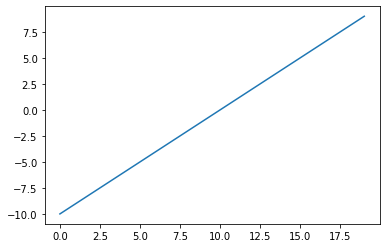

In [ ]:
plt.plot(tf.keras.activations.linear(A))

In [ ]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification model

So far we were doing the sin of training and testing on same dataset.
So, its time to create a training and testing dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
tf.random.set_seed(42)

# Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
])

# Compiling
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])

# Fitting
history = model_8.fit(X, y, epochs=25)

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 2ms/step - loss: 0.6834 - accuracy: 0.5550
Epoch 2/25
32/32 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.5630
Epoch 3/25
32/32 [==============================] - 0s 2ms/step - loss: 0.6700 - accuracy: 0.5600
Epoch 4/25
32/32 [==============================] - 0s 2ms/step - loss: 0.6615 - accuracy: 0.5960
Epoch 5/25
32/32 [==============================] - 0s 2ms/step - loss: 0.6553 - accuracy: 0.5850
Epoch 6/25
32/32 [==============================] - 0s 2ms/step - loss: 0.6386 - accuracy: 0.6360
Epoch 7/25
32/32 [==============================] - 0s 2ms/step - loss: 0.6150 - accuracy: 0.6890
Epoch 8/25
32/32 [==============================] - 0s 3ms/step - loss: 0.5641 - accuracy: 0.7480
Epoch 9/25
32/32 [==============================] - 0s 2ms/step - loss: 0.5101 - accuracy: 0.8090
Epoch 10/25
32/32 [==============================] - 0s 2ms/step - loss: 0.4451 - accuracy: 0.8550
Epoch 11/25
32/32 [===========

In [ ]:
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1418 - accuracy: 0.9850


[0.1417662799358368, 0.9850000143051147]

doing binary classification...
doing binary classification...


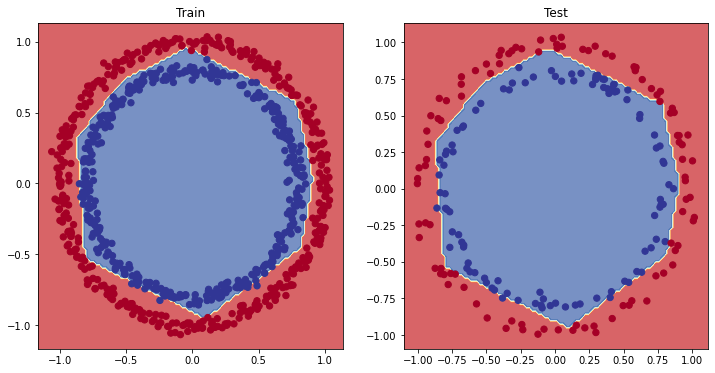

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundry(model_8, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundry(model_8, X_test, y_test)
plt.show();

## Lets plot the loss (training) curves

In [ ]:
history.history

{'loss': [0.6834276914596558,
  0.6761109232902527,
  0.6699899435043335,
  0.6615183353424072,
  0.6552616953849792,
  0.6386087536811829,
  0.6149913668632507,
  0.5641001462936401,
  0.5100768208503723,
  0.44511285424232483,
  0.4106609523296356,
  0.3722422122955322,
  0.31056877970695496,
  0.2761620879173279,
  0.24212242662906647,
  0.21157293021678925,
  0.1925615519285202,
  0.17182129621505737,
  0.15992897748947144,
  0.14190204441547394,
  0.1375376135110855,
  0.1299901306629181,
  0.12192884832620621,
  0.11015976965427399,
  0.10725069791078568],
 'accuracy': [0.5550000071525574,
  0.5630000233650208,
  0.5600000023841858,
  0.5960000157356262,
  0.5849999785423279,
  0.6359999775886536,
  0.6890000104904175,
  0.7480000257492065,
  0.8090000152587891,
  0.8550000190734863,
  0.824999988079071,
  0.8769999742507935,
  0.9399999976158142,
  0.949999988079071,
  0.9670000076293945,
  0.9800000190734863,
  0.9779999852180481,
  0.9829999804496765,
  0.9760000109672546,
  0

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.683428,0.555
1,0.676111,0.563
2,0.669990,0.560
3,0.661518,0.596
4,0.655262,0.585
5,0.638609,0.636
6,0.614991,0.689
7,0.564100,0.748
8,0.510077,0.809
9,0.445113,0.855


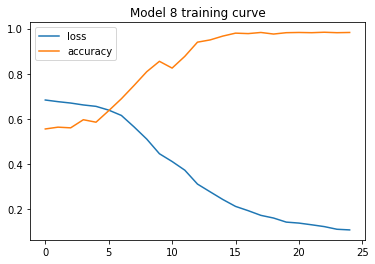

In [ ]:
pd.DataFrame(history.history).plot()
plt.title("Model 8 training curve");

## Finding the best learning rate
To find the ideal learning rate(learning rate where the loss decreases the most during training) we use the following steps:

* A learning rate **callback** - extra piece of functionality while model is training.
* Another model.
* A modified loss curve plots.

In [ ]:
tf.random.set_seed(42)

# Creating
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# Compiling 
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch/20))
# Fitting
history = model_9.fit(X_train,y_train,epochs=100,callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.4988 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.4975 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5075 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.5075 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6873 - accuracy: 0.5050 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5088 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

In [ ]:
model_9.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.9561 - accuracy: 0.5000


[0.9560865163803101, 0.5]

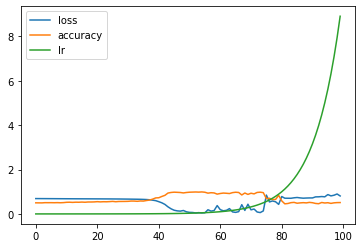

<Figure size 720x504 with 0 Axes>

In [ ]:
pd.DataFrame(history.history).plot();
plt.figure(figsize=(10, 7));

In [ ]:
# plot learining rate versus loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

Text(0.5, 1.0, 'Learning Rate vs Loss')

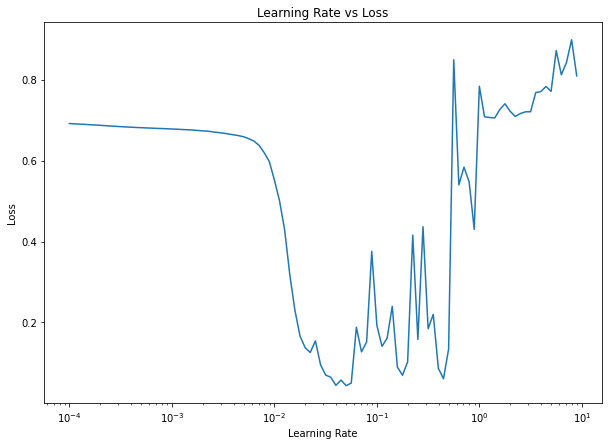

In [ ]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")

In [ ]:
# Now building the model with ideal learning rate we found which we think is about 0.02
tf.random.set_seed(42)

# Creating
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# Compiling 
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.02),
                metrics=["accuracy"])

# Fitting
history = model_10.fit(X_train,y_train,epochs=20)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 1s 2ms/step - loss: 0.6801 - accuracy: 0.5863
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6694 - accuracy: 0.5888
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6533 - accuracy: 0.6075
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6342 - accuracy: 0.6475
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5787 - accuracy: 0.7200
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5361 - accuracy: 0.7500
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4275 - accuracy: 0.8662
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3479 - accuracy: 0.9137
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2778 - accuracy: 0.9350
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2362 - accuracy: 0.9538
Epoch 11/20
25/25 [===========

In [ ]:
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2150 - accuracy: 0.9100


[0.21504619717597961, 0.9100000262260437]

In [ ]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1418 - accuracy: 0.9850


[0.1417662799358368, 0.9850000143051147]

doing binary classification...
doing binary classification...


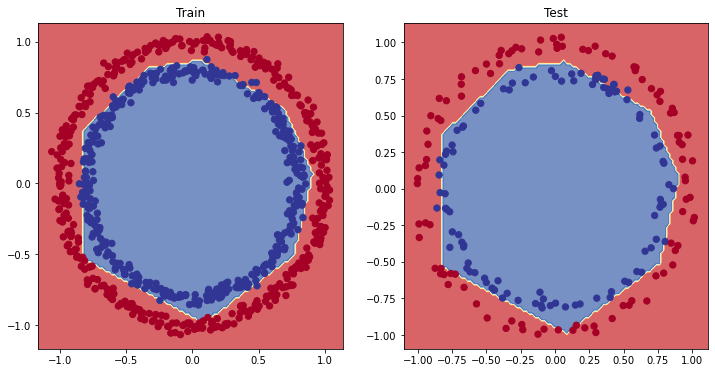

In [ ]:
# Plot the decision boundries for training and test set
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundry(model_10, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundry(model_10, X_test, y_test)
plt.show()

## More classification evaluation methods
Alongside visualizing our models result as much as possible, there are handful of other classfication methods and metrics:
* Accuracy
* Precision
* Recall
* F1 score
* Confusion Matrix
* Classification report (from sklearn)


In [ ]:
# Check the accuracy of our model 
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.2150 - accuracy: 0.9100
Model loss on the test set: 0.21504619717597961
Model accuracy on the test set: 91.00%


## Lets try confusion matrix

In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix
 
y_preds = model_10.predict(X_test)
confusion_matrix(y_test,y_preds)

ValueError: ignored

In [ ]:
y_test[:10]

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0])

In [ ]:
y_preds[:10]

array([[9.3463701e-01],
       [8.5691214e-03],
       [9.8140275e-01],
       [9.2461705e-04],
       [6.1867762e-01],
       [6.9378281e-01],
       [4.1258335e-04],
       [1.0054410e-03],
       [9.2127621e-01],
       [5.6454837e-03]], dtype=float32)

Our prediction array comes out in **prediction probability** form. The standard output from sigmoid and softmax like activation functions

In [ ]:
# Convert the predictions to binary format
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
# Lets create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  1],
       [17, 83]])

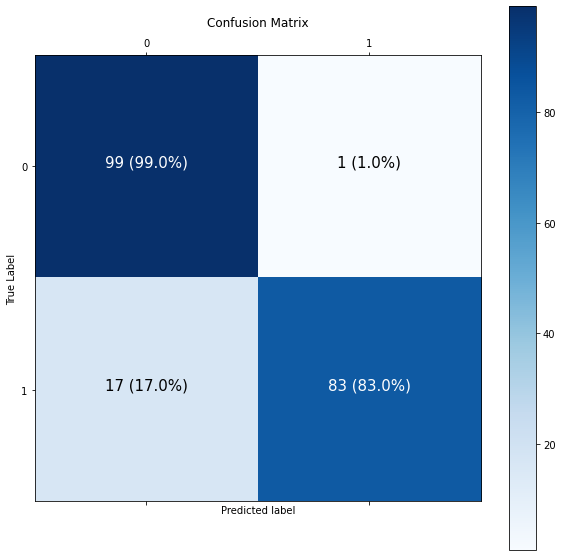

In [ ]:
import itertools
figsize = (10, 10)

# Create confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

# Lets pretify
fig, ax = plt.subplots(figsize=figsize)
# Create matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels=classes
else:
  labels=np.arange(cm.shape[0])

# Label Axis
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels
       )
# Set threshold for different colors
threshold = (cm.max() + cm.min())/2

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

# Working with larger example (multiclass classification model)

To practice multiclass classification we're going to build a neural network to classify different items of clothing.
For this we can use fashion_mnist dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Data has already been sorted in training and testing sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [ ]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training labels:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# Check the shape of the single example
train_data[0].shape,  train_labels[0].shape

((28, 28), ())

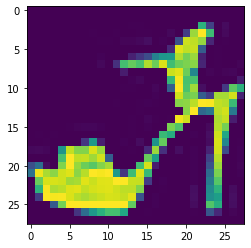

In [ ]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[9]);

In [ ]:
train_labels[9]

5

In [ ]:
# Creating a small list so the labels can be human readable.
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Coat')

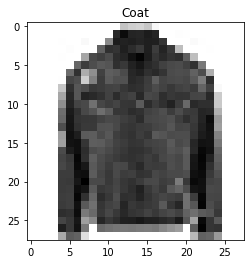

In [ ]:
plt.imshow(train_data[29], cmap=plt.cm.binary)
plt.title(class_names[train_labels[29]])

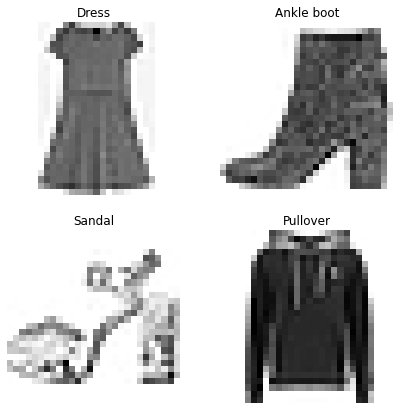

In [ ]:
# Plot multiple random images
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  random_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[random_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[random_index]])
  plt.axis(False)

## Building a multiclass classification model
Except for the few things everything is going to be similar as binary class classification. We're going to tweak some stuff:
* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (1 per class)
* Loss function = `tf.keras.CategoricalCrossEntropy()`
  * If the labels are not one hot encoded use `tf.keras.SparseCategoricalCrossEntropy()`
* Output layer activation = Softmax


In [ ]:
tf.random.set_seed(42)

# Create
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])
# Compile
model_11.compile(loss="SparseCategoricalCrossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
# Fit
non_norm_history = model_11.fit(train_data, train_labels, epochs=10, validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [ ]:
model_11.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_35 (Dense)            (None, 4)                 3140      
                                                                 
 dense_36 (Dense)            (None, 4)                 20        
                                                                 
 dense_37 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check the min and max values of our training data
train_data.min(), train_data.max()

(0, 255)

Neural Networks prefer data to be scaled (or normalized), this means they like to have numbers in tensors between 0 & 1.

In [ ]:
# We can normalize our data by dividing training and testing sets by maximum which in our case 255
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0
train_data_norm.min(), train_data_norm.max() 

(0.0, 1.0)

In [ ]:
# Now build same model as before after normalization
tf.random.set_seed(42)

# Create 
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

# Compile
model_12.compile(loss="SparseCategoricalCrossentropy",
                 optimizer="Adam",
                 metrics=["accuracy"])

# Fit
norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

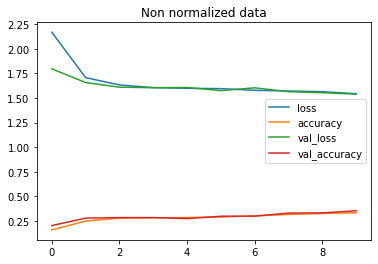

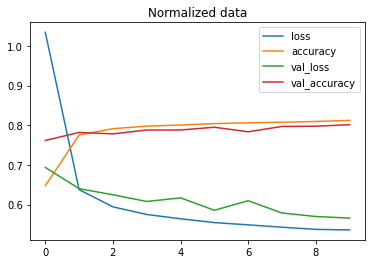

In [ ]:
import pandas as pd
# non normalized curve vs normalized curve 
pd.DataFrame(non_norm_history.history).plot(title="Non normalized data");
pd.DataFrame(norm_history.history).plot(title="Normalized data");

In [ ]:
## Finding the ideal learning rate
tf.random.set_seed(42)

# Create
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

# Compile
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create Learning Rate Callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

Text(0.5, 1.0, 'Finding the ideal learning rate')

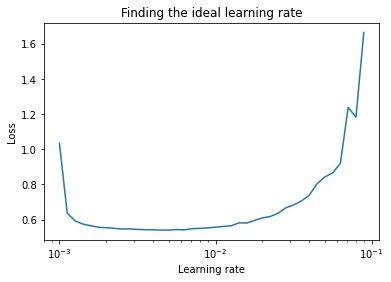

In [ ]:
# Plot learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20)) 
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [ ]:
1e-3

0.001

In [ ]:
# So by the loss curve we can see that default learning rate with Adam is ideal in our case but still lets refit it
tf.random.set_seed(42)

# Create
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

# Compile
model_14.compile(loss="SparseCategoricalCrossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

# Fit
history_14 = model_14.fit(train_data_norm, train_labels,epochs=20,validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

## Evaluating our multiclass classification model

To evaluate our multiclass classification model we could:
* Evaluate its performance using other classification metrics
(such as a confusion matrix)
* Asses some of its predictions (through visualizations)
* Improve its results by training it for longer or changing the architechture
* Save and export it for use in our application.

Lets go through the top 2...

In [ ]:
# Create confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(15,15), text_size=15):

  # Create confusion matrix
  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  # Lets pretify
  fig, ax = plt.subplots(figsize=figsize)
  # Create matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels=classes
  else:
    labels=np.arange(cm.shape[0])

  # Label Axis
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True Label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes),
         xticklabels=labels,
         yticklabels=labels
         )

  # Set x-axis label to botton
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min())/2

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
y_probs = model_14.predict(test_data_norm) # prediction probabilities

y_probs[:5]

array([[8.56299753e-11, 3.53615629e-13, 2.66337556e-05, 4.63562024e-08,
        5.09498605e-05, 9.61192474e-02, 8.17780403e-08, 9.18688551e-02,
        4.06052778e-03, 8.07873666e-01],
       [3.42785552e-06, 1.28992649e-16, 9.59891498e-01, 2.05162564e-07,
        1.53292371e-02, 2.45320095e-13, 2.41428725e-02, 1.13834485e-28,
        6.32718089e-04, 4.47896404e-08],
       [6.10630595e-05, 9.96576726e-01, 4.38669758e-08, 3.34058981e-03,
        1.32494861e-05, 1.43831603e-21, 8.27906115e-06, 7.32374630e-18,
        5.48116041e-08, 4.92251402e-14],
       [7.50314357e-05, 9.90536869e-01, 4.25285322e-07, 9.22318175e-03,
        1.36231421e-04, 1.82760903e-18, 2.68082422e-05, 4.81248308e-14,
        1.45215904e-06, 2.22114601e-11],
       [7.21899569e-02, 1.54957536e-06, 2.55668938e-01, 1.03631355e-02,
        4.35413495e-02, 1.10693023e-13, 6.16930187e-01, 6.75438989e-23,
        1.30491622e-03, 1.21404065e-09]], dtype=float32)

In [ ]:
y_probs[0], class_names[tf.argmax(y_probs[0])]

(array([8.5629975e-11, 3.5361563e-13, 2.6633756e-05, 4.6356202e-08,
        5.0949860e-05, 9.6119247e-02, 8.1778040e-08, 9.1868855e-02,
        4.0605278e-03, 8.0787367e-01], dtype=float32), 'Ankle boot')

In [ ]:
y_preds = y_probs.argmax(axis=1)
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

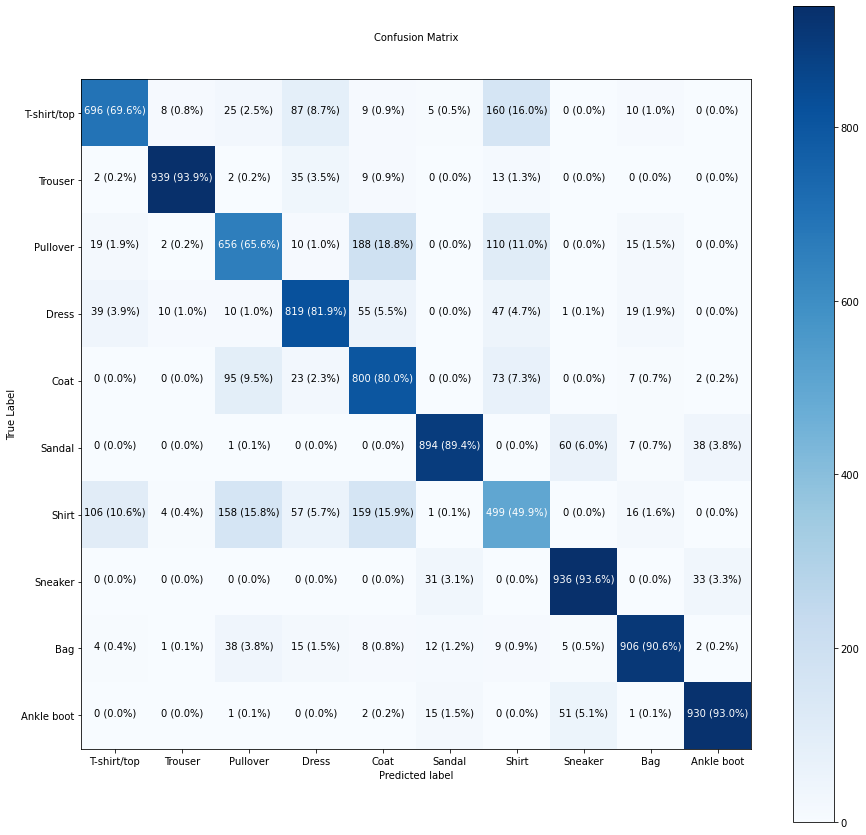

In [ ]:
make_confusion_matrix(test_labels, y_preds, class_names, text_size=10)

> Its good to visualize as much as possible. Lets create funtion for visualizations which can:
* Plot a random image.
* Make prediction on said image.
* Label the plot with truth label and predicted label.

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image plots it and labels it with prediction and truth label
  """
  # Set up random integer
  i = random.randint(0, len(images))

  # Create prediction and target
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_labels = classes[pred_probs.argmax()]
  true_labels = classes[true_labels[i]]

  # plot image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change color of titles depending on if the prediction is right or wrong
  if pred_labels == true_labels:
    color = "green"
  else:
    color = "red"
  
  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True:{})".format(pred_labels,
                                                  100*tf.reduce_max(pred_probs),
                                                  true_labels),
             color=color)

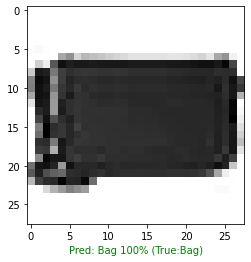

In [ ]:
plot_random_image(model=model_14,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

## What patterns our model learning?

In [ ]:
# Find layers of our most recent model
model_14.layers

In [ ]:
model_14.layers[1]

In [ ]:
# Get the patterns of layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.7150263 , -0.06077093, -0.99763095, -1.0484313 ],
        [ 0.2773212 , -0.471554  , -0.52916455,  0.02329255],
        [ 0.7752433 ,  0.5402759 , -1.128857  , -0.7426156 ],
        ...,
        [-0.3945342 ,  0.47628632, -0.2264153 ,  0.2550593 ],
        [-0.40515798,  0.61810046,  0.23928414, -0.50387603],
        [ 0.23884593,  0.11606961, -0.12131374,  0.04352392]],
       dtype=float32), (784, 4))

In [ ]:
model_14.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_56 (Dense)            (None, 4)                 3140      
                                                                 
 dense_57 (Dense)            (None, 4)                 20        
                                                                 
 dense_58 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Now lets check out the bias vector...

In [ ]:
biases, biases.shape

(array([ 2.4485964e-02, -6.1471871e-04, -2.7230152e-01,  8.1124878e-01],
       dtype=float32), (4,))

In [ ]:
model_14.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_56 (Dense)            (None, 4)                 3140      
                                                                 
 dense_57 (Dense)            (None, 4)                 20        
                                                                 
 dense_58 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


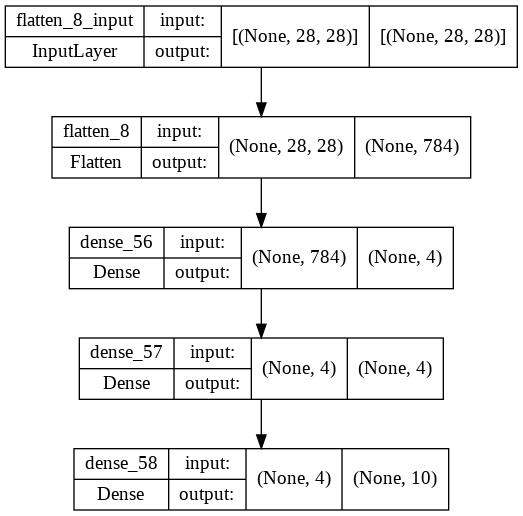

In [ ]:
# Another way to check out our deep learning models
from tensorflow.keras.utils import plot_model
# Inputs and Outputs of each layer
plot_model(model_14, show_shapes=True)